<a href="https://colab.research.google.com/github/vanesamp07/Python/blob/main/Desafio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Conectamos el archivo con los documentos en el drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#Importamos el archivo CSV con el set de datos que utilizaremos
file_path = '/content/drive/MyDrive/Colab Notebooks/baby.csv'

In [3]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import binom

In [4]:
#Ingresamos los datos en un Dataframe y los leemos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/baby.csv',delimiter=',')
df.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos
correspondientes.

In [5]:
#Validamos tipos de datos
df.dtypes

,0
Unnamed: 0,int64
Birth.Weight,int64
Gestational.Days,int64
Maternal.Age,int64
Maternal.Height,int64
Maternal.Pregnancy.Weight,int64
Maternal.Smoker,bool


In [6]:
#Validamos estadistidicos
df.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


In [7]:
#Exploramos datos faltantes en las columnas
df.isnull().sum()

,0
Unnamed: 0,0
Birth.Weight,0
Gestational.Days,0
Maternal.Age,0
Maternal.Height,0
Maternal.Pregnancy.Weight,0
Maternal.Smoker,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [9]:
#Contamos la cantidad de registros por columna
df.count()

,0
Unnamed: 0,1174
Birth.Weight,1174
Gestational.Days,1174
Maternal.Age,1174
Maternal.Height,1174
Maternal.Pregnancy.Weight,1174
Maternal.Smoker,1174


In [10]:
df.shape

(1174, 7)

2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución
normal? Justica tu respuesta creando los grácos y modelos necesarios.


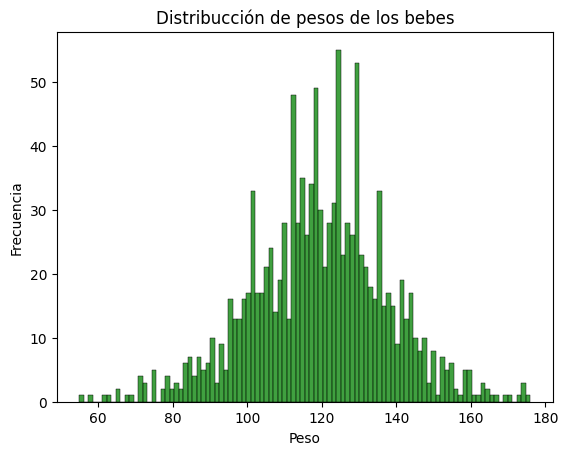

In [11]:
#Graficamos un histograma para observar el comportamiento de pesos de los bebes
#Usamos 100 bins (rangos)
#Los bins se pueden cambiar, entre mas bins, se observará más preciso el análisis de datos
sns.histplot(data=df["Birth.Weight"], bins=100, color="green")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.title("Distribucción de pesos de los bebes")
plt.show()

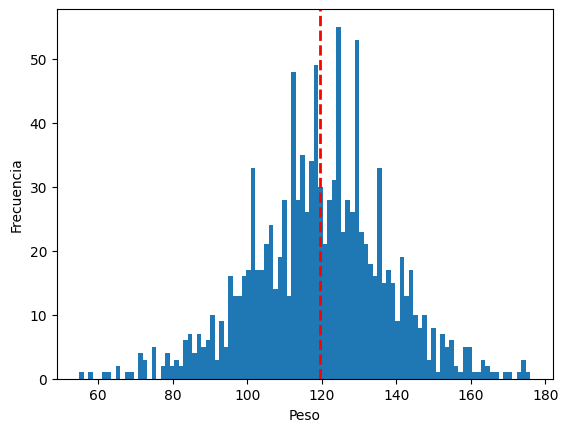

In [12]:
#Graficamos nuevamente
pesos=df['Birth.Weight'].dropna()
media=np.mean(pesos)
plt.hist(pesos, bins=100)
plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

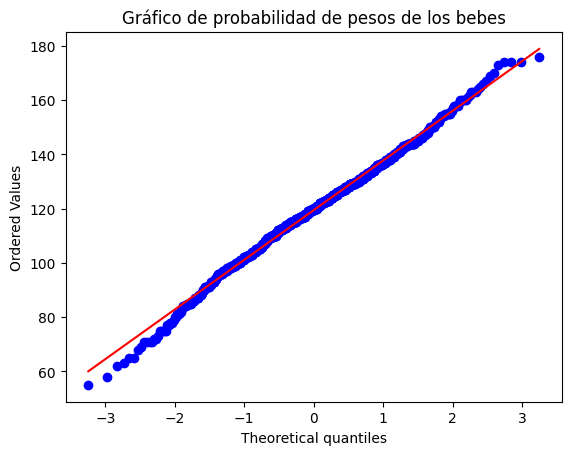

In [13]:
#Validamos también mediante un grafico Q-Q
stats.probplot(df["Birth.Weight"], dist="norm", plot=plt)
plt.title("Gráfico de probabilidad de pesos de los bebes")
plt.show()

Para validar si el peso de los bebes sigue una distribucción normal, se utilizaron 2 graficos, un histograma y un Q-Q. Del histograma se observa que el comportamiento no sigue un patron de distribucción normal y del Q-Q se observa que los datos no siguen la linea recta, por lo que tampoco hay representación de una distribucción normal en este segundo caso.

3. Considerando lo anterior, verica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

In [14]:
#Tomamos una muestra de 5 datos al azar del conjunto de datos
#Usamos random_state para que los datos aleatorios no cambien cada vez que se ejecute el codigo
nuevos_datos = df["Birth.Weight"].sample(n=5, random_state=42).values

#Calculamos la media y la desviacion
media = df["Birth.Weight"].mean()
desviación = df["Birth.Weight"].std()

#Aplicamos el parametro loc a la media y el parametro scale a la desviacion
#Usamos stats.norm.pdf para calcular la Funcion de Densidad de Probabilidad (PDF)
probabilidades = stats.norm.pdf(nuevos_datos, loc=media, scale=desviación)

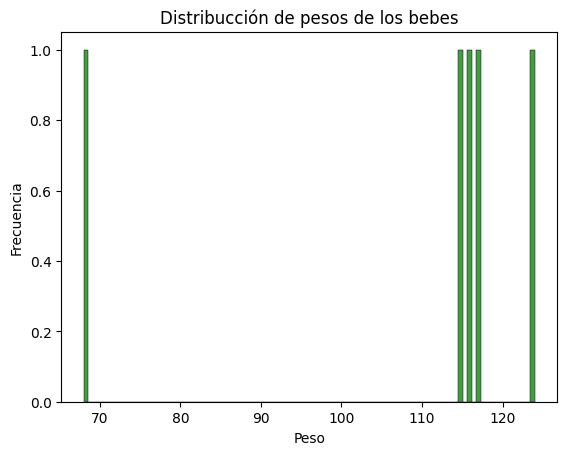

In [15]:
#Graficamos mediante un histogrma
sns.histplot(data=nuevos_datos, bins=100, color="green")
plt.title("Distribucción de peso de bebes con 5 muestras aleatorias")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.title("Distribucción de pesos de los bebes")
plt.show()

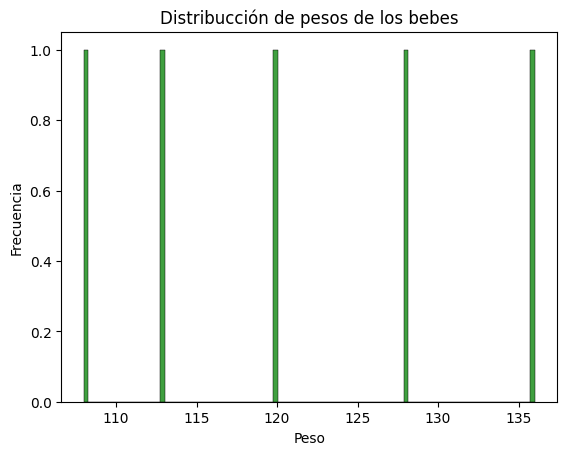

In [16]:
#Realizamos el mismo procedimiento, en este caso para los primeros 5 datos de la muestra
nuevos_datos_parte2 = df["Birth.Weight"].head(5).values
media = df["Birth.Weight"].mean()
desviación = df["Birth.Weight"].std()
probabilidades = stats.norm.pdf(nuevos_datos_parte2, loc=media, scale=desviación)

#Graficamos
sns.histplot(data=nuevos_datos_parte2, bins=100, color="green")
plt.title("Distribucción de peso de bebes con 5 muestras aleatorias")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.title("Distribucción de pesos de los bebes")
plt.show()

Para este caso, se escogieron 5 muestras del conjunto de datos para revisar si se establecia una distribucción normal. Se tuvieron en cuenta 2 casos:
1. 5 datos aleatorios.
2. Los 5 primeros datos.

Para el caso 1. no hay distribucción normal y se observa mayor concentracción la izquierda.
Para el caso 2. no hay distribucción normal y se observa dispersión en la grafica de los datos simulados

4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué
diferencias existen? Explica y construye los modelos correspondientes.

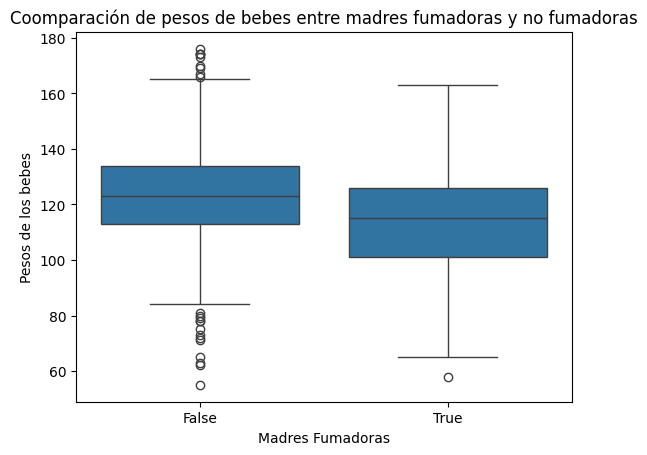

In [17]:
madres_fumadoras = df[df["Maternal.Smoker"] == True]["Birth.Weight"]
madres_nofumadoras = df[df["Maternal.Smoker"] == False]["Birth.Weight"]

#Coomparamos los datos mediante un boxplot
sns.boxplot(x="Maternal.Smoker", y="Birth.Weight", data=df)
plt.xlabel("Madres Fumadoras")
plt.ylabel("Pesos de los bebes")
plt.title("Coomparación de pesos de bebes entre madres fumadoras y no fumadoras")
plt.show()

Para el caso anterior, para las madres fumadoras la concentracción de datos alrededor de la media es mayor (percentil 25 alrededor de 100gr y percentil 75 alrededor de 125gr). Para las no fumadoras hay mas outlayers (entre 110gr (25%) y 135gr (75%) aprox) y el minimo en peso tiende a ser menor para las madres fumadoras.

Por otro lado, para las no fumadoras, la media tiende a ser mas normal y hay menos dispersion de datos.

5. Considerando los datos dados:
- Calcula la probabilidad de que una madre escogida al azar fume.
- A partir del valor anterior, construye un modelo de distribución binomial que
modele el experimento correspondiente a escoger 5 madres al azar y observar
cuántas fuman.
- Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias
muestrales.
- Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula
sus respectivas medias muestrales.


In [18]:
#Probabilidad de que una madre escogida al azar fume
madres_fumadoras = df[df["Maternal.Smoker"] == "True"].shape[0]
num_madres = df.shape[0]
probabilidad_fumar = madres_fumadoras / num_madres
print(f"La probabilidad de que una madre escogida al azar fume es: {probabilidad_fumar}")

La probabilidad de que una madre escogida al azar fume es: 0.0


In [19]:
#Modelo de escoger 5 madres al azar para observar cuantas fuman
# Número de intentos (madres seleccionadas)
n = 5

binom_dist = stats.binom(n, probabilidad_fumar)
probabilidades = [binom_dist.pmf(k) for k in range(n+1)]

# Imprimimos las probabilidades
for k, prob in enumerate(probabilidades):
    print(f"P(X = {k}) = {prob}")

P(X = 0) = 1.0
P(X = 1) = 0.0
P(X = 2) = 0.0
P(X = 3) = 0.0
P(X = 4) = 0.0
P(X = 5) = 0.0


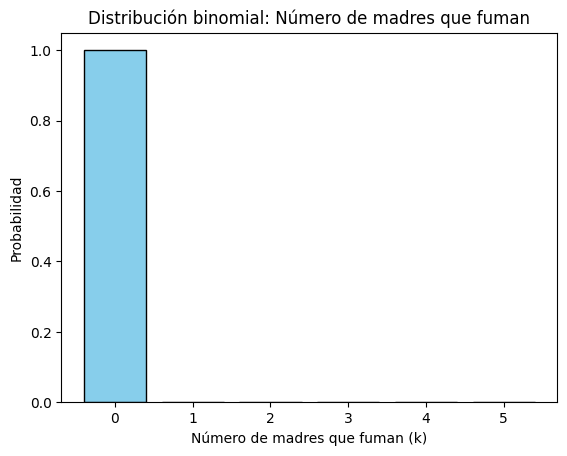

In [20]:
# Graficamos la distribución binomial de escoger 5 madres al azar
plt.bar(range(n+1), probabilidades, tick_label=range(n+1), color="skyblue", edgecolor="black")
plt.title("Distribución binomial: Número de madres que fuman")
plt.xlabel("Número de madres que fuman (k)")
plt.ylabel("Probabilidad")
plt.xticks(range(n+1))
plt.show()

In [24]:
#Usamos una probabilidad de exito igual al 60% (p = 0.6)
p= 0.6
k= 8

#observemos el uso de la función random.binomial
for i in range(10):
  print(np.random.binomial(k,p,size=i+1))

[3]
[5 5]
[3 6 7]
[5 7 5 7]
[6 6 3 5 2]
[6 7 6 2 8 3]
[7 8 6 5 3 7 7]
[5 6 4 4 4 2 4 3]
[7 1 5 6 5 6 4 3 4]
[7 5 3 3 5 4 4 6 6 5]


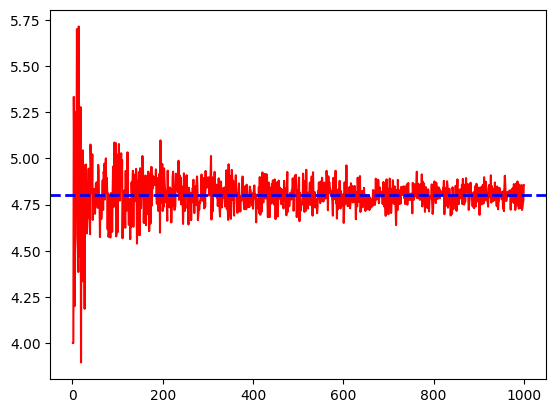

In [27]:
#Simulamos 1000 muestrales (n) de tamaño 8 (k=8)
n = 1000

medias_binom=[]
for j in range(n):
  medias_binom.append(np.mean(np.random.binomial(k,p,size=j+1)))

plt.plot(range(1,n+1),medias_binom, color='red',)
plt.axhline(y=k*p, color='blue', linestyle='dashed', linewidth=2, label='k*p')

plt.show()

In [31]:
#Utilizamos los datos directamente
#Realizamos el muestreo 1000 veces
#Calculamos las medias muestrales
medias_muestrales = []

for _ in range (1000):
  #Extraemos una muestra aleatoria de tamaño 8
  muestra = df["Birth.Weight"].sample(n=8, random_state=None)
  medias_muestrales.append(muestra.mean())

medias_muestrales = np.array(medias_muestrales)

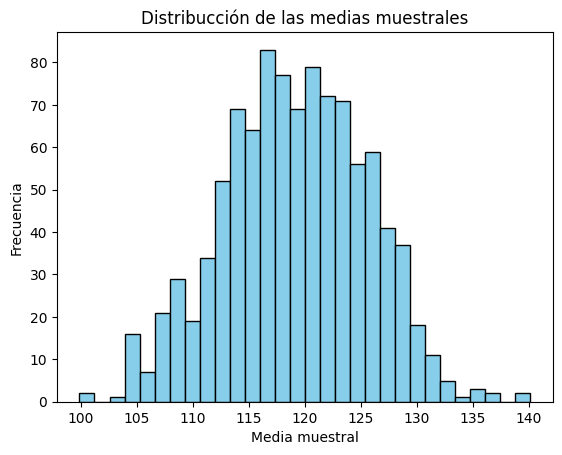

In [32]:
#Graficamos la distribucción de las medias muestrales
plt.hist(medias_muestrales, bins=30, color="skyblue", edgecolor = "black")
plt.xlabel("Media muestral")
plt.ylabel("Frecuencia")
plt.title("Distribucción de las medias muestrales")
plt.show()

compara grácamente los resultados obtenidos anteriormente.
● verica el teorema del límite central, considerando las muestras de datos reales y
las simuladas con el modelo binomial.
● construye un modelo de distribución normal derivado del modelo binomial, y
grafícalo junto a los anteriores para comparar. Concluye.


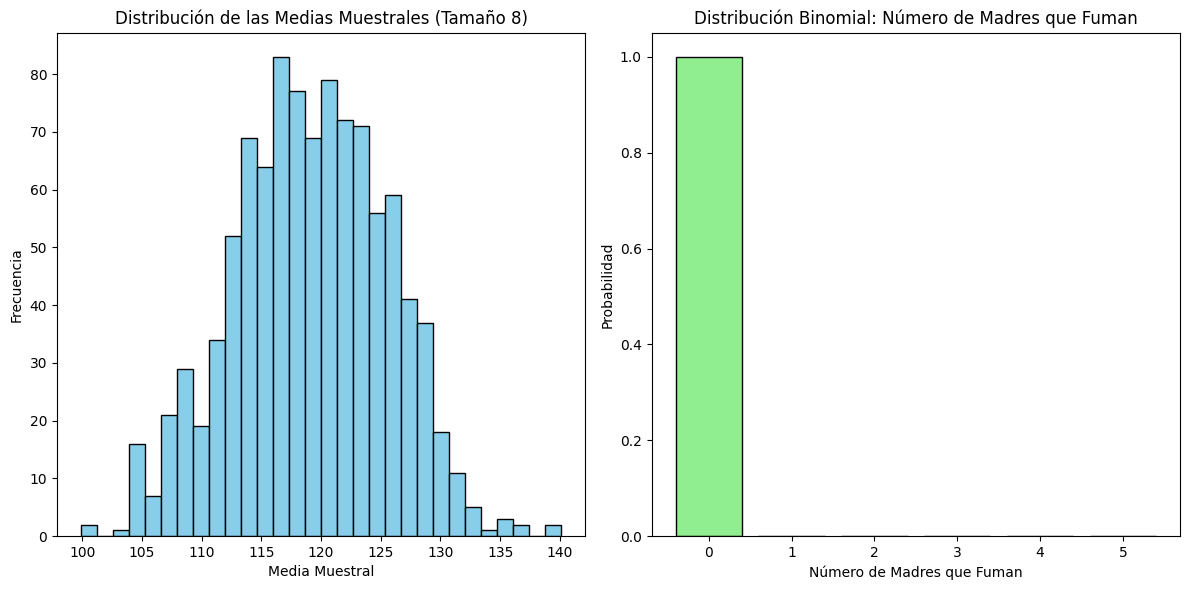

In [34]:
#Coomparamos graficamente los resultados obtenidos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(medias_muestrales, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de las Medias Muestrales (Tamaño 8)')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')

#Histograma de la distribución binomial (para comparar)
n = 5
probabilidad_fumar = 0.00  # Probabilidad de que una madre fume

#Calculamos las probabilidades de la distribución binomial
binom_dist = stats.binom(n, probabilidad_fumar)
k_values = range(n + 1)
binomial_probs = [binom_dist.pmf(k) for k in k_values]

#Graficamos la distribución binomial
plt.subplot(1, 2, 2)
plt.bar(k_values, binomial_probs, color='lightgreen', edgecolor='black')
plt.title('Distribución Binomial: Número de Madres que Fuman')
plt.xlabel('Número de Madres que Fuman')
plt.ylabel('Probabilidad')

plt.tight_layout()
plt.show()

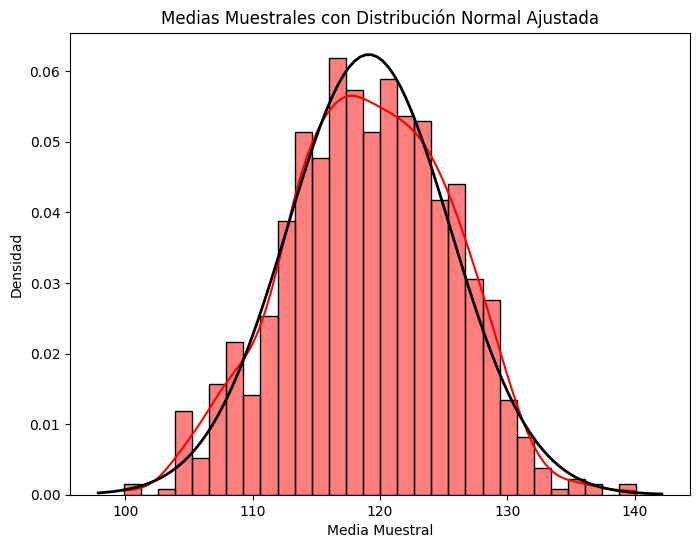

In [35]:
#Verificación del teorema del limite central
#Media y desviación estándar de las medias muestrales
media_muestral = medias_muestrales.mean()
desviacion_muestral = medias_muestrales.std()

#Graficamos las medias muestrales junto a una distribución normal ajustada
plt.figure(figsize=(8, 6))

#Graficamos el histograma de las medias muestrales
sns.histplot(medias_muestrales, kde=True, stat='density', color='red', bins=30, edgecolor='black')

#Ajustamos una distribución normal sobre las medias muestrales
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_muestral, desviacion_muestral)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Medias Muestrales con Distribución Normal Ajustada')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.show()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


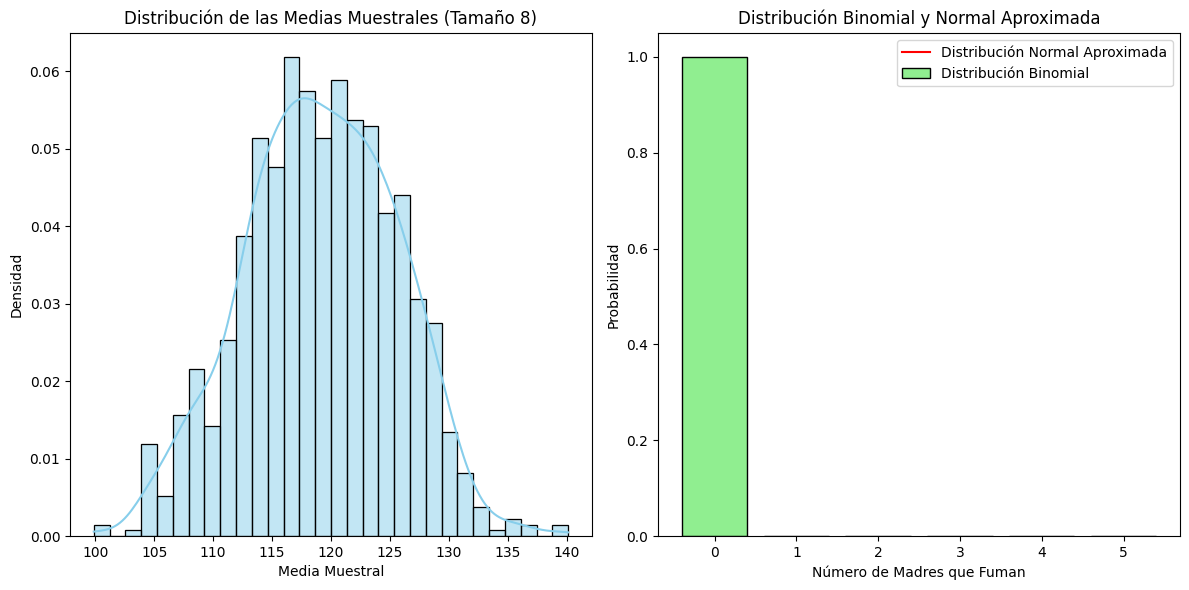

In [36]:
#Costruimos modelo de distribucción normal derivado del binomial
n = 5
p = 0.00

#Media y desviación estándar de la distribución normal aproximada
mu_binomial = n * p
sigma_binomial = np.sqrt(n * p * (1 - p))

#Graficamos la distribución normal derivada de la binomial
x_norm = np.linspace(0, n, 100)
y_norm = norm.pdf(x_norm, mu_binomial, sigma_binomial)

# Graficamos las distribuciones
plt.figure(figsize=(12, 6))

# Graficamos la distribución de las medias muestrales
plt.subplot(1, 2, 1)
sns.histplot(medias_muestrales, kde=True, stat='density', color='skyblue', bins=30, edgecolor='black')
plt.title('Distribución de las Medias Muestrales (Tamaño 8)')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')

# Graficamos la distribución binomial con la normal derivada
plt.subplot(1, 2, 2)
plt.bar(k_values, binomial_probs, color='lightgreen', edgecolor='black', label='Distribución Binomial')
plt.plot(x_norm, y_norm, 'r-', label='Distribución Normal Aproximada')
plt.title('Distribución Binomial y Normal Aproximada')
plt.xlabel('Número de Madres que Fuman')
plt.ylabel('Probabilidad')
plt.legend()

plt.tight_layout()
plt.show()